In [20]:
from FEM_solver import *
from mesh_library_old import mesh_gen_uniform_2D_grid, plot_mesh

In [41]:
mesh = mesh_gen_uniform_2D_grid(3,3, "triangle")


In [42]:
mesh_new = meshio.read("SimpleMesh_3by3.msh")

In [47]:
mesh.cell_sets

{'boundary': array([[0, 1, 2],
        [6, 7, 8],
        [0, 3, 6],
        [2, 5, 8]])}

In [33]:
mesh_new.cell_data

{'gmsh:physical': [array([1, 1, 2, 2, 3, 3, 4, 4], dtype=int32),
  array([6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)],
 'gmsh:geometrical': [array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
  array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)]}

In [55]:
mesh_new.cells_dict

{'line': array([[0, 3],
        [3, 6],
        [2, 5],
        [5, 8],
        [0, 1],
        [1, 2],
        [6, 7],
        [7, 8]], dtype=int32),
 'triangle': array([[0, 1, 4],
        [0, 4, 3],
        [1, 2, 5],
        [1, 5, 4],
        [3, 4, 7],
        [3, 7, 6],
        [4, 5, 8],
        [4, 8, 7]], dtype=int32)}

In [64]:
def get_mesh_info(mesh):

    EtoV =np.array([])

    try :
        EtoV = mesh.cells_dict["triangle"]
    except:
        print("No triangle cells found")
    
    try :
        EtoV = mesh.cells_dict["quad"]
    except:
        print("No quad cells found")

    coords = mesh.points[:, :2]

    return EtoV, coords

In [65]:
get_mesh_info(mesh_new)

No quad cells found


(array([0., 1., 4., 0., 4., 3., 1., 2., 5., 1., 5., 4., 3., 4., 7., 3., 7.,
        6., 4., 5., 8., 4., 8., 7.]),
 array([[-2. , -2. ],
        [ 0.5, -2. ],
        [ 3. , -2. ],
        [-2. ,  0. ],
        [ 0.5,  0. ],
        [ 3. ,  0. ],
        [-2. ,  2. ],
        [ 0.5,  2. ],
        [ 3. ,  2. ]]))

In [14]:
model = PotentialFlowSolver_FEM(mesh)

In [15]:
for i in range(4):
    model.impose_BC("Dirichlet", i, lambda x, y: x+y)

In [18]:
model.solve()

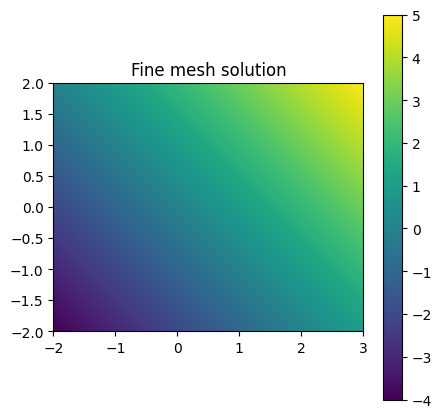

In [19]:
model.plot_solution(figsize= (5,5), title = "Fine mesh solution")